[View in Colaboratory](https://colab.research.google.com/github/Kzis/analytic_bnk48/blob/master/graph.ipynb)

Saving BNK48.csv to BNK48 (21).csv


No handles with labels found to put in legend.


[['2561/10/16 10:09:36 หลังเที่ยง GMT+7', '2561/10/17 9:17:15 ก่อนเที่ยง GMT+7', '2561/10/17 9:17:33 ก่อนเที่ยง GMT+7', '2561/10/17 9:18:39 ก่อนเที่ยง GMT+7', '2561/10/17 9:19:46 ก่อนเที่ยง GMT+7', '2561/10/17 9:21:08 ก่อนเที่ยง GMT+7', '2561/10/17 9:23:12 ก่อนเที่ยง GMT+7', '2561/10/17 9:25:13 ก่อนเที่ยง GMT+7', '2561/10/17 9:26:21 ก่อนเที่ยง GMT+7', '2561/10/17 9:32:30 ก่อนเที่ยง GMT+7', '2561/10/17 9:37:18 ก่อนเที่ยง GMT+7', '2561/10/17 9:40:25 ก่อนเที่ยง GMT+7', '2561/10/17 9:40:45 ก่อนเที่ยง GMT+7', '2561/10/17 9:42:40 ก่อนเที่ยง GMT+7', '2561/10/17 9:45:27 ก่อนเที่ยง GMT+7', '2561/10/17 10:11:01 ก่อนเที่ยง GMT+7', '2561/10/17 10:21:00 ก่อนเที่ยง GMT+7', '2561/10/17 10:40:11 ก่อนเที่ยง GMT+7', '2561/10/17 10:46:39 ก่อนเที่ยง GMT+7', '2561/10/17 10:55:28 ก่อนเที่ยง GMT+7', '2561/10/17 10:57:47 ก่อนเที่ยง GMT+7', '2561/10/17 11:01:42 ก่อนเที่ยง GMT+7', '2561/10/17 12:12:46 หลังเที่ยง GMT+7', '2561/10/17 12:30:39 หลังเที่ยง GMT+7', '2561/10/17 12:46:20 หลังเที่ยง GMT+7', '2561/10/17 

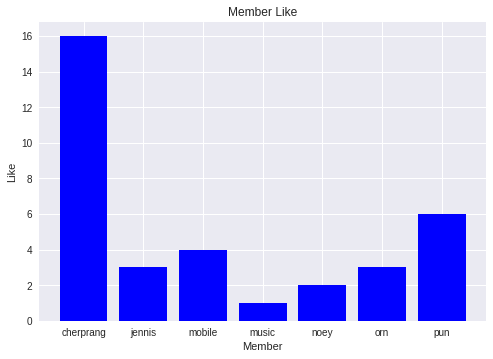

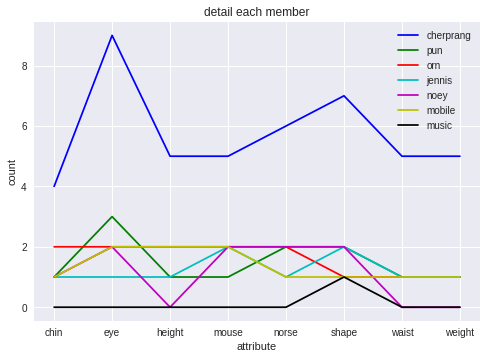

In [26]:
from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt

list_column_dataframe = ['member_like', ' member_like_eye' , 'member_like_norse' , 
              'member_like_chin' , 'member_like_mouse' , 'member_like_shape' , 
              'member_like_height' , 'member_like_waist' , ' member_like_weight',
              'face_cherpang','face_pun','face_orn','face_jennis','face_noey','face_mobile','face_music',
              'ear_cherpang','ear_pun','ear_orn','ear_jennis','ear_noey','ear_mobile','ear_music',
              'eye_cherpang','eye_pun','eye_orn','eye_jennis','eye_noey','eye_mobile','eye_music',
              'norse_cherpang','norse_pun','norse_orn','norse_jennis','norse_noey','norse_mobile','norse_music',
              'mouse_cherpang','mouse_pun','mouse_orn','mouse_jennis','mouse_noey','mouse_mobile','mouse_music',
              'eyebrow_cherpang','eyebrow_pun','eyebrow_orn','eyebrow_jennis','eyebrow_noey','eyebrow_mobile','eyebrow_music',
              'chin_cherpang','chin_pun','chin_orn','chin_jennis','chin_noey','chin_mobile','chin_music',
              'shape_cherpang','shape_pun','shape_orn','shape_jennis','shape_noey','shape_mobile','shape_music',
              'height 150-155','height 156-160','height 161-165','height 166-170','height 170+',
              'weight 41-45','weight 46-50','weight 51-55','weight 56-60','weight 60+',
              'waist 23-25','waist 26-28','waist 29-31','waist 32-34','waist 34+',
              'cheerful','plead','panic','storng','leader','man','feeble','cute','sexy','bold'
              ]              
def upload_file():
  uploaded = files.upload()
  return uploaded

def convert_score_to_binomial(list_score):
  list_binomial = []
  for score in list_score:
    if int(score) == 5:
      list_binomial.append(1)
    else:
      list_binomial.append(0)
  return list_binomial

def convert_height_like_to_binomial(height_like_list):
  height_likert = []
  for height in height_like_list:
    if height == "150-155":
      height_likert.append([1,0,0,0,0])
    elif height == "156-160":
      height_likert.append([0,1,0,0,0])
    elif height == "161-165":
      height_likert.append([0,0,1,0,0])
    elif height == "166-170":
      height_likert.append([0,0,0,1,0])
    else: #170+
      height_likert.append([0,0,0,0,1])
  return height_likert
      
def covert_weight_like_to_binomial(weight_like_list):
  weight_likert = []
  for weight in weight_like_list:
    if weight == "41-45":
      weight_likert.append([1,0,0,0,0])
    elif weight == "46-50":
      weight_likert.append([0,1,0,0,0])
    elif weight == "51-55":
      weight_likert.append([0,0,1,0,0])
    elif weight == "56-60":
      weight_likert.append([0,0,0,1,0])
    else: #60+
      weight_likert.append([0,0,0,0,1])
  return weight_likert

def covert_waist_like_to_binomial(waist_like_list):
  waist_likert = []
  for  waist in waist_like_list:
    if waist == "23-25":
      waist_likert.append([1,0,0,0,0])
    elif waist == "26-28":
      waist_likert.append([0,1,0,0,0])
    elif waist == "29-31":
      waist_likert.append([0,0,1,0,0])
    elif waist == "32-34":
      waist_likert.append([0,0,0,1,0])
    else: #34+
      waist_likert.append([0,0,0,0,1])
  return waist_likert

def convert_characteristic_to_binomial(characteristic_list):
  characteristic_likert = []
  for characteristic in characteristic_list:
    if characteristic == "ร่าเริงสดใส":
      characteristic_likert.append([1,0,0,0,0,0,0,0,0,0])
    elif characteristic == "ขี้อ้อน":
      characteristic_likert.append([0,1,0,0,0,0,0,0,0,0])
    elif characteristic == "ขี้กลัว":
      characteristic_likert.append([0,0,1,0,0,0,0,0,0,0])
    elif characteristic == "แข็งแกร่ง":
      characteristic_likert.append([0,0,0,1,0,0,0,0,0,0])
    elif characteristic == "เป็นผู้นำ":
      characteristic_likert.append([0,0,0,0,1,0,0,0,0,0])
    elif characteristic == "แมน":
      characteristic_likert.append([0,0,0,0,0,1,0,0,0,0])
    elif characteristic == "บอบบาง":
      characteristic_likert.append([0,0,0,0,0,0,1,0,0,0])
    elif characteristic == "น่ารัก":
      characteristic_likert.append([0,0,0,0,0,0,0,1,0,0])
    elif characteristic == "เซ็กซี่":
      characteristic_likert.append([0,0,0,0,0,0,0,0,1,0])
    else: #ห้าว
      characteristic_likert.append([0,0,0,0,0,0,0,0,0,1])
  return characteristic_likert
  
def get_user_info(df_list):  
  time = df_list[0]
  gender = df_list[1]
  age =  df_list[2]
  user_information = (time , gender , age)
  return user_information

def get_member_like_info(df_list):
  member_like = df_list[3]
  eye = convert_score_to_binomial(df_list[4])
  norse = convert_score_to_binomial(df_list[5])
  chin = convert_score_to_binomial(df_list[6])
  mouse = convert_score_to_binomial(df_list[7])
  shape = convert_score_to_binomial(df_list[8])
  height = convert_score_to_binomial(df_list[9])
  waist = convert_score_to_binomial(df_list[10])
  weight = convert_score_to_binomial(df_list[11])
  member_like_info = (member_like,eye,norse,chin,mouse,shape,height,waist,weight)
  return member_like_info

def get_face_info(df_list):
  cherpang = convert_score_to_binomial(df_list[12])
  pun = convert_score_to_binomial(df_list[13])
  orn = convert_score_to_binomial(df_list[14])
  jennis = convert_score_to_binomial(df_list[15])
  noey = convert_score_to_binomial(df_list[16])
  mobile = convert_score_to_binomial(df_list[17])
  music = convert_score_to_binomial(df_list[18])
  face_info = (cherpang,pun,orn,jennis,noey,mobile,music)
  return face_info

def get_ear_info(df_list):
  cherpang = convert_score_to_binomial(df_list[19])
  pun = convert_score_to_binomial(df_list[20])
  orn = convert_score_to_binomial(df_list[21])
  jennis = convert_score_to_binomial(df_list[22])
  noey = convert_score_to_binomial(df_list[23])
  mobile = convert_score_to_binomial(df_list[24])
  music = convert_score_to_binomial(df_list[25])
  ear_info = (cherpang,pun,orn,jennis,noey,mobile,music)
  return ear_info

def get_eye_info(df_list):
  cherpang = convert_score_to_binomial(df_list[26])
  pun = convert_score_to_binomial(df_list[27])
  orn = convert_score_to_binomial(df_list[28])
  jennis = convert_score_to_binomial(df_list[29])
  noey = convert_score_to_binomial(df_list[30])
  mobile = convert_score_to_binomial(df_list[31])
  music = convert_score_to_binomial(df_list[32])
  eye_info = (cherpang,pun,orn,jennis,noey,mobile,music)
  return eye_info

def get_norse_info(df_list):
  cherpang = convert_score_to_binomial(df_list[33])
  pun = convert_score_to_binomial(df_list[34])
  orn = convert_score_to_binomial(df_list[35])
  jennis = convert_score_to_binomial(df_list[36])
  noey = convert_score_to_binomial(df_list[37])
  mobile = convert_score_to_binomial(df_list[38])
  music = convert_score_to_binomial(df_list[39])
  norse_info = (cherpang,pun,orn,jennis,noey,mobile,music)
  return norse_info

def get_mouse_info(df_list):
  cherpang = convert_score_to_binomial(df_list[40])
  pun = convert_score_to_binomial(df_list[41])
  orn = convert_score_to_binomial(df_list[42])
  jennis = convert_score_to_binomial(df_list[43])
  noey = convert_score_to_binomial(df_list[44])
  mobile = convert_score_to_binomial(df_list[45])
  music = convert_score_to_binomial(df_list[46])
  mouse_info = (cherpang,pun,orn,jennis,noey,mobile,music)
  return mouse_info

def get_eyebrow_info(df_list):
  cherpang = convert_score_to_binomial(df_list[47])
  pun = convert_score_to_binomial(df_list[48])
  orn = convert_score_to_binomial(df_list[49])
  jennis = convert_score_to_binomial(df_list[50])
  noey = convert_score_to_binomial(df_list[51])
  mobile = convert_score_to_binomial(df_list[52])
  music = convert_score_to_binomial(df_list[53])
  eyebrow_info = (cherpang,pun,orn,jennis,noey,mobile,music)
  return eyebrow_info

def get_chin_info(df_list):
  cherpang = convert_score_to_binomial(df_list[54])
  pun = convert_score_to_binomial(df_list[55])
  orn = convert_score_to_binomial(df_list[56])
  jennis = convert_score_to_binomial(df_list[57])
  noey = convert_score_to_binomial(df_list[58])
  mobile = convert_score_to_binomial(df_list[59])
  music = convert_score_to_binomial(df_list[60])
  chin_info = (cherpang,pun,orn,jennis,noey,mobile,music)
  return chin_info

def get_shape_info(df_list):
  cherpang = convert_score_to_binomial(df_list[54])
  pun = convert_score_to_binomial(df_list[55])
  orn = convert_score_to_binomial(df_list[56])
  jennis = convert_score_to_binomial(df_list[57])
  noey = convert_score_to_binomial(df_list[58])
  mobile = convert_score_to_binomial(df_list[59])
  music = convert_score_to_binomial(df_list[60])
  shape_info = (cherpang,pun,orn,jennis,noey,mobile,music)
  return shape_info

def get_dataset_list(*data):
  dataset_list = []
  for i in range(0,len(data[0][0])):
    temp_list = []
    
    # member_like_info
    temp_list.append(data[1][0][i])
    temp_list.append(data[1][1][i])
    temp_list.append(data[1][2][i])
    temp_list.append(data[1][3][i])
    temp_list.append(data[1][4][i])
    temp_list.append(data[1][5][i])
    temp_list.append(data[1][6][i])
    temp_list.append(data[1][7][i])
    temp_list.append(data[1][8][i])
    
    # face_info
    temp_list.append(data[2][0][i])
    temp_list.append(data[2][1][i])
    temp_list.append(data[2][2][i])
    temp_list.append(data[2][3][i])
    temp_list.append(data[2][4][i])
    temp_list.append(data[2][5][i])
    temp_list.append(data[2][6][i])
    
    # ear_info
    temp_list.append(data[3][0][i])
    temp_list.append(data[3][1][i])
    temp_list.append(data[3][2][i])
    temp_list.append(data[3][3][i])
    temp_list.append(data[3][4][i])
    temp_list.append(data[3][5][i])
    temp_list.append(data[3][6][i])
    
    # eye_info
    temp_list.append(data[4][0][i])
    temp_list.append(data[4][1][i])
    temp_list.append(data[4][2][i])
    temp_list.append(data[4][3][i])
    temp_list.append(data[4][4][i])
    temp_list.append(data[4][5][i])
    temp_list.append(data[4][6][i])
    
    # norse_info
    temp_list.append(data[5][0][i])
    temp_list.append(data[5][1][i])
    temp_list.append(data[5][2][i])
    temp_list.append(data[5][3][i])
    temp_list.append(data[5][4][i])
    temp_list.append(data[5][5][i])
    temp_list.append(data[5][6][i])
    
    # mouse_info
    temp_list.append(data[6][0][i])
    temp_list.append(data[6][1][i])
    temp_list.append(data[6][2][i])
    temp_list.append(data[6][3][i])
    temp_list.append(data[6][4][i])
    temp_list.append(data[6][5][i])
    temp_list.append(data[6][6][i])
    
    # eyebrow_info
    temp_list.append(data[7][0][i])
    temp_list.append(data[7][1][i])
    temp_list.append(data[7][2][i])
    temp_list.append(data[7][3][i])
    temp_list.append(data[7][4][i])
    temp_list.append(data[7][5][i])
    temp_list.append(data[7][6][i])
    
    # chin_info
    temp_list.append(data[8][0][i])
    temp_list.append(data[8][1][i])
    temp_list.append(data[8][2][i])
    temp_list.append(data[8][3][i])
    temp_list.append(data[8][4][i])
    temp_list.append(data[8][5][i])
    temp_list.append(data[8][6][i])
    
    # shape_info
    temp_list.append(data[9][0][i])
    temp_list.append(data[9][1][i])
    temp_list.append(data[9][2][i])
    temp_list.append(data[9][3][i])
    temp_list.append(data[9][4][i])
    temp_list.append(data[9][5][i])
    temp_list.append(data[9][6][i])
    
    # height_info
    for j in data[10][i]:
      temp_list.append(j)
    
    # weight_info
    for j in data[11][i]:
      temp_list.append(j)
    
    # waist_info
    for j in data[12][i]:
      temp_list.append(j)
    
    # characteristic_info
    for j in data[13][i]:
      temp_list.append(j)
     
    dataset_list.append(temp_list)
  print(dataset_list)
  
  return dataset_list

def count_member_like(dataset_list):
  cherpang_like = 0
  pun_like = 0
  orn_like = 0
  jennis_like = 0
  noey_like = 0
  mobile_like = 0
  music_like = 0
  for member_like in dataset_list:
    member = member_like[0].lower()
    if member == "cherprang":
      cherpang_like +=1
    elif member == "pun":
      pun_like +=1
    elif member == "orn":
      orn_like +=1
    elif member == "jennis":
      jennis_like +=1
    elif member == "noey":
      noey_like +=1
    elif member == "mobile":
      mobile_like +=1
    else:
      music_like +=1
   
  x_member = ["cherprang","pun","orn","jennis","noey","mobile","music"]
  y_like = [cherpang_like,pun_like,orn_like,jennis_like,noey_like,mobile_like,music_like]
  plt.bar(x_member, y_like, color='b')
  plt.plot()

  plt.xlabel("Member")
  plt.ylabel("Like")
  plt.title("Member Like")
  plt.legend()
  plt.show()

def count_score_member(dataset_list):
  eye = [0,0,0,0,0,0,0]
  norse = [0,0,0,0,0,0,0]
  chin = [0,0,0,0,0,0,0]
  mouse = [0,0,0,0,0,0,0]
  shape = [0,0,0,0,0,0,0]
  height = [0,0,0,0,0,0,0]
  weight = [0,0,0,0,0,0,0]
  waist = [0,0,0,0,0,0,0]
  for member_like in dataset_list:
    member = member_like[0].lower()
    if member == "cherprang":
      eye[0] = eye[0]+1 if int(member_like[1])==1 else eye[0]
      norse[0] = norse[0]+1 if int(member_like[2])==1 else norse[0]
      chin[0] = chin[0]+1 if int(member_like[3])==1 else chin[0]
      mouse[0] = mouse[0]+1 if int(member_like[4])==1 else mouse[0]
      shape[0] = shape[0]+1 if int(member_like[5])==1 else shape[0]
      height[0] = height[0]+1 if int(member_like[6])==1 else height[0]
      weight[0] = weight[0]+1 if int(member_like[7])==1 else weight[0]
      waist[0] = waist[0]+1 if int(member_like[8])==1 else waist[0]
    elif member == "pun":
      eye[1] = eye[1]+1 if int(member_like[1])==1 else eye[1]
      norse[1] = norse[1]+1 if int(member_like[2])==1 else norse[1]
      chin[1] = chin[1]+1 if int(member_like[3])==1 else chin[1]
      mouse[1] = mouse[1]+1 if int(member_like[4])==1 else mouse[1]
      shape[1] = shape[1]+1 if int(member_like[5])==1 else shape[1]
      height[1] = height[1]+1 if int(member_like[6])==1 else height[1]
      weight[1] = weight[1]+1 if int(member_like[7])==1 else weight[1]
      waist[1] = waist[1]+1 if int(member_like[8])==1 else waist[1]
    elif member == "orn":
      eye[2] = eye[2]+1 if int(member_like[1])==1 else eye[2]
      norse[2] = norse[2]+1 if int(member_like[2])==1 else norse[2]
      chin[2] = chin[2]+1 if int(member_like[3])==1 else chin[2]
      mouse[2] = mouse[2]+1 if int(member_like[4])==1 else mouse[2]
      shape[2] = shape[2]+1 if int(member_like[5])==1 else shape[2]
      height[2] = height[2]+1 if int(member_like[6])==1 else height[2]
      weight[2] = weight[2]+1 if int(member_like[7])==1 else weight[2]
      waist[2] = waist[2]+1 if int(member_like[8])==1 else waist[2]
    elif member == "jennis":
      eye[3] = eye[3]+1 if int(member_like[1])==1 else eye[3]
      norse[3] = norse[3]+1 if int(member_like[2])==1 else norse[3]
      chin[3] = chin[3]+1 if int(member_like[3])==1 else chin[3]
      mouse[3] = mouse[3]+1 if int(member_like[4])==1 else mouse[3]
      shape[3] = shape[3]+1 if int(member_like[5])==1 else shape[3]
      height[3] = height[3]+1 if int(member_like[6])==1 else height[3]
      weight[3] = weight[3]+1 if int(member_like[7])==1 else weight[3]
      waist[3] = waist[3]+1 if int(member_like[8])==1 else waist[3]
    elif member == "noey":
      eye[4] = eye[4]+1 if int(member_like[1])==1 else eye[4]
      norse[4] = norse[4]+1 if int(member_like[2])==1 else norse[4]
      chin[4] = chin[4]+1 if int(member_like[3])==1 else chin[4]
      mouse[4] = mouse[4]+1 if int(member_like[4])==1 else mouse[4]
      shape[4] = shape[4]+1 if int(member_like[5])==1 else shape[4]
      height[4] = height[4]+1 if int(member_like[6])==1 else height[4]
      weight[4] = weight[4]+1 if int(member_like[7])==1 else weight[4]
      waist[4] = waist[4]+1 if int(member_like[8])==1 else waist[4]
    elif member == "mobile":
      eye[5] = eye[5]+1 if int(member_like[1])==1 else eye[5]
      norse[5] = norse[5]+1 if int(member_like[2])==1 else norse[5]
      chin[5] = chin[5]+1 if int(member_like[3])==1 else chin[5]
      mouse[5] = mouse[5]+1 if int(member_like[4])==1 else mouse[5]
      shape[5] = shape[5]+1 if int(member_like[5])==1 else shape[5]
      height[5] = height[5]+1 if int(member_like[6])==1 else height[5]
      weight[5] = weight[5]+1 if int(member_like[7])==1 else weight[5]
      waist[5] = waist[5]+1 if int(member_like[8])==1 else waist[5]
    else: #music
      eye[6] = eye[6]+1 if int(member_like[1])==1 else eye[6]
      norse[6] = norse[6]+1 if int(member_like[2])==1 else norse[6]
      chin[6] = chin[6]+1 if int(member_like[3])==1 else chin[6]
      mouse[6] = mouse[6]+1 if int(member_like[4])==1 else mouse[6]
      shape[6] = shape[6]+1 if int(member_like[5])==1 else shape[6]
      height[6] = height[6]+1 if int(member_like[6])==1 else height[6]
      weight[6] = weight[6]+1 if int(member_like[7])==1 else weight[6]
      waist[6] = waist[6]+1 if int(member_like[8])==1 else waist[6]
      
  x  = ["chin","eye","height","mouse","norse","shape","waist","weight"]
  y1 = [chin[0], eye[0], height[0], mouse[0], norse[0], shape[0], waist[0], weight[0]]
  y2 = [chin[1], eye[1], height[1], mouse[1], norse[1], shape[1], waist[1], weight[1]]
  y3 = [chin[2], eye[2], height[2], mouse[2], norse[2], shape[2], waist[2], weight[2]]
  y4 = [chin[3], eye[3], height[3], mouse[3], norse[3], shape[3], waist[3], weight[3]]
  y5 = [chin[4], eye[4], height[4], mouse[4], norse[4], shape[4], waist[4], weight[4]]
  y6 = [chin[5], eye[5], height[5], mouse[5], norse[5], shape[5], waist[5], weight[5]]
  y7 = [chin[6], eye[6], height[6], mouse[6], norse[6], shape[6], waist[6], weight[6]]
  
  plt.plot(x, y1, label="cherprang" ,color='b')
  plt.plot(x, y2, label="pun",color='g')
  plt.plot(x, y3, label="orn",color='r')
  plt.plot(x, y4, label="jennis",color='c')
  plt.plot(x, y5, label="noey",color='m')
  plt.plot(x, y6, label="mobile",color='y')
  plt.plot(x, y7, label="music",color='black')
  plt.plot()

  plt.xlabel("attribute")
  plt.ylabel("count")
  plt.title("detail each member")
  plt.legend()
  plt.show()
  

def main():
  pd.set_option('display.max_columns', None)
  uploaded = upload_file()
  data = uploaded['BNK48.csv'].decode('utf-8') 
  df = pd.read_csv(io.StringIO(data))
  df_list = df.values.T.tolist()
  print(df_list)
  
  user_info = get_user_info(df_list)
  member_like_info = get_member_like_info(df_list)
  face_info = get_face_info(df_list)
  ear_info = get_ear_info(df_list)
  eye_info = get_eye_info(df_list)
  norse_info = get_norse_info(df_list)
  mouse_info = get_mouse_info(df_list)
  eyebrow_info = get_eyebrow_info(df_list)
  chin_info = get_chin_info(df_list)
  shape_info = get_shape_info(df_list)
  height_info = convert_height_like_to_binomial(df_list[68])
  weight_info = covert_weight_like_to_binomial(df_list[69])
  waist_info = covert_waist_like_to_binomial(df_list[70])
  characteristic_info = convert_characteristic_to_binomial(df_list[71])

  data_set_list = get_dataset_list(user_info,member_like_info,face_info,ear_info,
                               eye_info,norse_info,mouse_info,eyebrow_info,
                               chin_info,shape_info,height_info,weight_info,
                               waist_info,characteristic_info)
  
  count_member_like(data_set_list)
  count_score_member(data_set_list)
   
if __name__ == "__main__":
  main()